In [399]:
import pyodbc
import pandas as pd

# Configuración de conexiones
AZURE_SERVER = 'uaxmathfis.database.windows.net'
AZURE_DATABASE = 'usecases'
AZURE_DRIVER = '{ODBC Driver 17 for SQL Server}'
AZURE_AUTH = 'Authentication=ActiveDirectoryInteractive'

# Crear conexión
conn = pyodbc.connect(f"DRIVER={AZURE_DRIVER};SERVER={AZURE_SERVER};DATABASE={AZURE_DATABASE};{AZURE_AUTH}", timeout=10)

# Escribir la consulta SQL
query = """
    SELECT * FROM [usecases].DATAEX.[IA_Client_segment_MODIFICADO]
"""

# Ejecutar la consulta y cargar los datos en un DataFrame
df = pd.read_sql(query, conn)


# Mostrar las primeras filas del DataFrame
df.head()

C:\Users\josit\AppData\Local\Temp\ipykernel_21896\3547504326.py:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,ID,Genero,Casado,Edad,Graduado,Profesion,Experiencia_laboral,Gastoscore,Family_Size,anno_nacimiento,Generacion,Ingresos_anuales_brutos,Provincia,Digital_encuesta,Gasto_medio_mensual_cuota,Abandono,Dias_cliente,Campanna_anno
0,CLI10,F,Si,67,Si,Ingeniero,+20annos,Bajo,3,1957,Generacion X,93442,Segovia,1385.0,80,True,195,NaN
1,CLI100,M,Si,64,Si,Medico,+20annos,Medio,2,1960,Generacion X,99774,Alicante,1052.0,50,True,360,5.0
2,CLI1000,M,Si,65,Si,Artista,+20annos,Medio,3,1959,Generacion X,36756,Toledo,1717.0,30,False,407,3.0
3,CLI10000,M,No,33,No,Funcionario,10-20annos,Bajo,4,1991,Millennials,24616,Leon,1606.0,30,False,544,4.0
4,CLI10001,M,Si,52,No,Otros,+20annos,Medio,2,1972,Generacion X,29834,LLeida,1346.0,30,True,170,NaN


In [400]:
# Ver valores únicos en la columna 'campanna_anno'
valores_unicos = df['Campanna_anno'].unique()
valores_unicos

array([nan,  5.,  3.,  4.,  1.])

In [401]:
# Ver valores únicos en la columna 'campanna_anno'
valores_unicos_2 = df['Profesion'].unique()
valores_unicos_2

array(['Ingeniero', 'Medico', 'Artista', 'Funcionario', 'Otros',
       'Ejecutivo', 'Construccion', 'Negocios/empresa', 'Servicios'],
      dtype=object)

In [402]:
# Ver valores únicos en la columna 'campanna_anno'
valores_unicos_3 = df['Gastoscore'].unique()
valores_unicos_3

array(['Bajo', 'Medio', 'Alto'], dtype=object)

In [403]:
# Ver valores únicos en la columna 'campanna_anno'
valores_unicos_4 = df['Provincia'].unique()
valores_unicos_4

array(['Segovia', 'Alicante', 'Toledo', 'Leon', 'LLeida', 'Ciudad Real',
       'i\x81vila', 'Guipiºzcoa', 'Vizcaya', 'Orense', 'Castellon',
       'Pontevedra', 'Almeri\xada', 'Valladolid', 'Jaen', 'Lugo',
       'Santa Cruz de Tenerife', 'Albacete', 'Huelva', 'Salamanca',
       'Ceuta', 'Baleares', 'Gerona', 'Barcelona', 'Sevilla',
       'Guadalajara', 'Soria', 'Caceres', 'Madrid', 'Cordoba', 'Burgos',
       'Cadiz', 'Navarra', 'Melilla', 'Granada', 'Badajoz', 'Valencia',
       'Tarragona', 'La Corui±a', 'Las Palmas', 'Murcia', 'Palencia',
       'La Rioja', 'Teruel', 'Zamora', 'Zaragoza', 'i\x81lava', 'Cuenca',
       'Huesca', 'Malaga'], dtype=object)

In [404]:
provincia_to_comunidad = {
    'i\x81vila': 'Castilla y León',
    'Álava': 'País Vasco',
    'i\x81lava': 'País Vasco',
    'Albacete': 'Castilla-La Mancha',
    'Alicante': 'Comunidad Valenciana',
    'Almería': 'Andalucía',
    'Ávila': 'Castilla y León',
    'Badajoz': 'Extremadura',
    'Guipiºzcoa': 'País Vasco',
    'Baleares': 'Islas Baleares',
    'Barcelona': 'Cataluña',
    'Burgos': 'Castilla y León',
    'Caceres': 'Extremadura',
    'Cadiz': 'Andalucía',
    'Castellon': 'Comunidad Valenciana',
    'Ciudad Real': 'Castilla-La Mancha',
    'Cordoba': 'Andalucía',
    'La Coruña': 'Galicia',
    'Cuenca': 'Castilla-La Mancha',
    'Gerona': 'Cataluña',
    'Granada': 'Andalucía',
    'Guadalajara': 'Castilla-La Mancha',
    'Guipúzcoa': 'País Vasco',
    'Huelva': 'Andalucía',
    'Huesca': 'Aragón',
    'Jaen': 'Andalucía',
    'Leon': 'Castilla y León',
    'LLeida': 'Cataluña',
    'La Rioja': 'La Rioja',
    'Lugo': 'Galicia',
    'Madrid': 'Comunidad de Madrid',
    'Malaga': 'Andalucía',
    'Melilla': 'Melilla',
    'Murcia': 'Región de Murcia',
    'Navarra': 'Navarra',
    'Orense': 'Galicia',
    'Palencia': 'Castilla y León',
    'Las Palmas': 'Canarias',
    'Pontevedra': 'Galicia',
    'Salamanca': 'Castilla y León',
    'Santa Cruz de Tenerife': 'Canarias',
    'Segovia': 'Castilla y León',
    'Sevilla': 'Andalucía',
    'Soria': 'Castilla y León',
    'Tarragona': 'Cataluña',
    'Teruel': 'Aragón',
    'Toledo': 'Castilla-La Mancha',
    'Valencia': 'Comunidad Valenciana',
    'Valladolid': 'Castilla y León',
    'Vizcaya': 'País Vasco',
    'Zamora': 'Castilla y León',
    'Zaragoza': 'Aragón',
    'Ceuta': 'Ceuta'
}

# Corregir nombres de provincias mal codificadas
df['Provincia'] = df['Provincia'].str.replace('i\x81', 'Á')  # Ej: i\x81vila → Ávila
df['Provincia'] = df['Provincia'].str.replace('i\x81lava', 'Álava')
df['Provincia'] = df['Provincia'].str.replace('Almeri\xada', 'Almería')
df['Provincia'] = df['Provincia'].str.replace('Guipiºzcoa', 'Guipúzcoa')
df['Provincia'] = df['Provincia'].str.replace('La Corui±a', 'La Coruña')

# Mapear a Comunidad Autónoma
df['Comunidad'] = df['Provincia'].map(provincia_to_comunidad)
df.drop('Provincia', axis=1, inplace=True)  #Eliminar columna original

In [405]:
# Ver valores únicos en la columna 'campanna_anno'
valores_unicos_4 = df['Comunidad'].unique()
valores_unicos_4

array(['Castilla y León', 'Comunidad Valenciana', 'Castilla-La Mancha',
       'Cataluña', 'País Vasco', 'Galicia', 'Andalucía', 'Canarias',
       'Ceuta', 'Islas Baleares', 'Extremadura', 'Comunidad de Madrid',
       'Navarra', 'Melilla', 'Región de Murcia', 'La Rioja', 'Aragón'],
      dtype=object)

In [406]:
df.head()

,ID,Genero,Casado,Edad,Graduado,Profesion,Experiencia_laboral,Gastoscore,Family_Size,anno_nacimiento,Generacion,Ingresos_anuales_brutos,Digital_encuesta,Gasto_medio_mensual_cuota,Abandono,Dias_cliente,Campanna_anno,Comunidad
0,CLI10,F,Si,67,Si,Ingeniero,+20annos,Bajo,3,1957,Generacion X,93442,1385.0,80,True,195,NaN,Castilla y León
1,CLI100,M,Si,64,Si,Medico,+20annos,Medio,2,1960,Generacion X,99774,1052.0,50,True,360,5.0,Comunidad Valenciana
2,CLI1000,M,Si,65,Si,Artista,+20annos,Medio,3,1959,Generacion X,36756,1717.0,30,False,407,3.0,Castilla-La Mancha
3,CLI10000,M,No,33,No,Funcionario,10-20annos,Bajo,4,1991,Millennials,24616,1606.0,30,False,544,4.0,Castilla y León
4,CLI10001,M,Si,52,No,Otros,+20annos,Medio,2,1972,Generacion X,29834,1346.0,30,True,170,NaN,Cataluña


In [407]:
# Contar valores nulos por columna
valores_nulos = df.isnull().sum()
valores_nulos

ID                              0
Genero                          0
Casado                        190
Edad                            0
Graduado                      103
Profesion                       0
Experiencia_laboral             0
Gastoscore                      0
Family_Size                     0
anno_nacimiento                 0
Generacion                      0
Ingresos_anuales_brutos         0
Digital_encuesta                0
Gasto_medio_mensual_cuota       0
Abandono                        0
Dias_cliente                    0
Campanna_anno                5707
Comunidad                       0
dtype: int64

In [408]:
# Eliminar filas donde 'Casado' o 'Graduado' tienen valores nulos
df_clean = df.dropna(subset=['Casado', 'Graduado'])

# Reemplazar valores nulos en 'Campanna_anno' con 0
df_clean['Campanna_anno'].fillna(0, inplace=True)

# Verificar cuántas filas se eliminaron
print(f"Filas originales: {len(df)}")
print(f"Filas después de eliminar nulos: {len(df_clean)}")
print(f"Filas eliminadas: {len(df) - len(df_clean)}")

Filas originales: 10806
Filas después de eliminar nulos: 10518
Filas eliminadas: 288


C:\Users\josit\AppData\Local\Temp\ipykernel_21896\4271724570.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['Campanna_anno'].fillna(0, inplace=True)
C:\Users\josit\AppData\Local\Temp\ipykernel_21896\4271724570.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Campanna_anno'].fillna(0, inplace=True)


In [409]:
# Contar valores nulos por columna
valores_nulos = df_clean.isnull().sum()
valores_nulos

ID                           0
Genero                       0
Casado                       0
Edad                         0
Graduado                     0
Profesion                    0
Experiencia_laboral          0
Gastoscore                   0
Family_Size                  0
anno_nacimiento              0
Generacion                   0
Ingresos_anuales_brutos      0
Digital_encuesta             0
Gasto_medio_mensual_cuota    0
Abandono                     0
Dias_cliente                 0
Campanna_anno                0
Comunidad                    0
dtype: int64

In [410]:
df_clean.head()

,ID,Genero,Casado,Edad,Graduado,Profesion,Experiencia_laboral,Gastoscore,Family_Size,anno_nacimiento,Generacion,Ingresos_anuales_brutos,Digital_encuesta,Gasto_medio_mensual_cuota,Abandono,Dias_cliente,Campanna_anno,Comunidad
0,CLI10,F,Si,67,Si,Ingeniero,+20annos,Bajo,3,1957,Generacion X,93442,1385.0,80,True,195,0.0,Castilla y León
1,CLI100,M,Si,64,Si,Medico,+20annos,Medio,2,1960,Generacion X,99774,1052.0,50,True,360,5.0,Comunidad Valenciana
2,CLI1000,M,Si,65,Si,Artista,+20annos,Medio,3,1959,Generacion X,36756,1717.0,30,False,407,3.0,Castilla-La Mancha
3,CLI10000,M,No,33,No,Funcionario,10-20annos,Bajo,4,1991,Millennials,24616,1606.0,30,False,544,4.0,Castilla y León
4,CLI10001,M,Si,52,No,Otros,+20annos,Medio,2,1972,Generacion X,29834,1346.0,30,True,170,0.0,Cataluña


In [411]:
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder

# --- Normalización (StandardScaler) ---
numeric_cols = ['Edad', 'Ingresos_anuales_brutos', "Digital_encuesta", 'Dias_cliente', 'Gasto_medio_mensual_cuota']
scaler = StandardScaler()
df_clean2 = df_clean.copy()
df_clean2.set_index('ID', inplace=True)
df_clean2[numeric_cols] = scaler.fit_transform(df_clean2[numeric_cols])

In [412]:
# --- Label Encoding para categóricas binarias ---
label_cols = ['Genero', 'Casado', "Experiencia_laboral", "Comunidad", 'Graduado', "Gastoscore", 'Profesion', 'Generacion', "Abandono"]
le = LabelEncoder()
for col in label_cols:
    df_clean2[col] = le.fit_transform(df_clean2[col])
df_clean2.drop('anno_nacimiento', axis=1, inplace=True)  # Eliminar la columna ID para el clustering

In [413]:
df_clean2.head()

,Genero,Casado,Edad,Graduado,Profesion,Experiencia_laboral,Gastoscore,Family_Size,Generacion,Ingresos_anuales_brutos,Digital_encuesta,Gasto_medio_mensual_cuota,Abandono,Dias_cliente,Campanna_anno,Comunidad
ID,,,,,,,,,,,,,,,,
CLI10,0,1,1.036719,1,4,0,1,3,1,1.052557,-0.100034,1.226055,1,-0.692744,0.0,3
CLI100,1,1,0.873632,1,5,0,2,2,1,1.231266,-0.255823,0.170131,1,0.416626,5.0,7
CLI1000,1,1,0.927994,1,0,0,2,3,1,-0.547295,0.055288,-0.533818,0,0.732628,3.0,4
CLI10000,1,0,-0.811600,0,3,1,1,4,3,-0.889922,0.003358,-0.533818,0,1.653741,4.0,3
CLI10001,1,1,0.221284,0,7,0,2,2,1,-0.742655,-0.118280,-0.533818,1,-0.860830,0.0,5


In [414]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

In [415]:

# Seleccionar solo las columnas numéricas (excluyendo ID y categóricas ya codificadas)
numeric_cols = ['Edad', 'Ingresos_anuales_brutos', 'Digital_encuesta', 
                'Gasto_medio_mensual_cuota', 'Dias_cliente']
X = df_clean2[numeric_cols]
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95) # Selección de componentes principales para explicar el 95% de la varianza.
X_pca = pca.fit_transform(X)

print(f"Número de componentes seleccionados para explicar el 95% de la varianza: {pca.n_components_}")

Número de componentes seleccionados para explicar el 95% de la varianza: 5


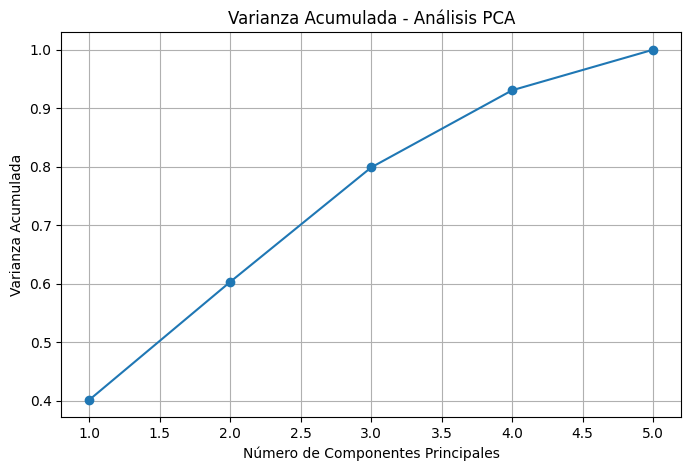

In [416]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1),
         pca.explained_variance_ratio_.cumsum(), marker='o')
plt.title('Varianza Acumulada - Análisis PCA')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Acumulada')
plt.grid()
plt.show()

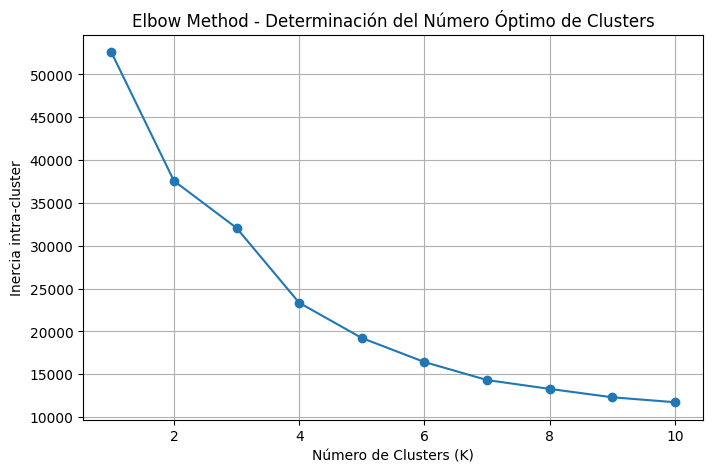

In [417]:
# Evaluación de la inercia para distintos valores de K.
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)

# Gráfico del método del codo
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, marker='o')
plt.title('Elbow Method - Determinación del Número Óptimo de Clusters')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Inercia intra-cluster')
plt.grid()
plt.show()

In [418]:
clusters = 3 # Número óptimo de clusters determinado visualmente.
print(f"El número óptimo de clusters es: {clusters}")

El número óptimo de clusters es: 3


In [419]:
kmeans = KMeans(n_clusters=clusters, random_state=42)
df_clean2['Cluster'] = kmeans.fit_predict(X_pca)

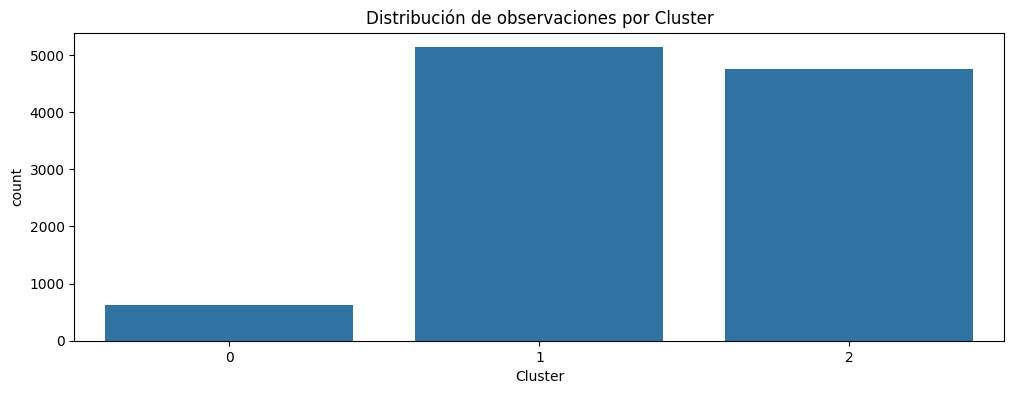

In [420]:
import seaborn as sns
plt.figure(figsize=(12, 4))
sns.countplot(x='Cluster', data=df_clean2)
plt.title('Distribución de observaciones por Cluster')
plt.show()

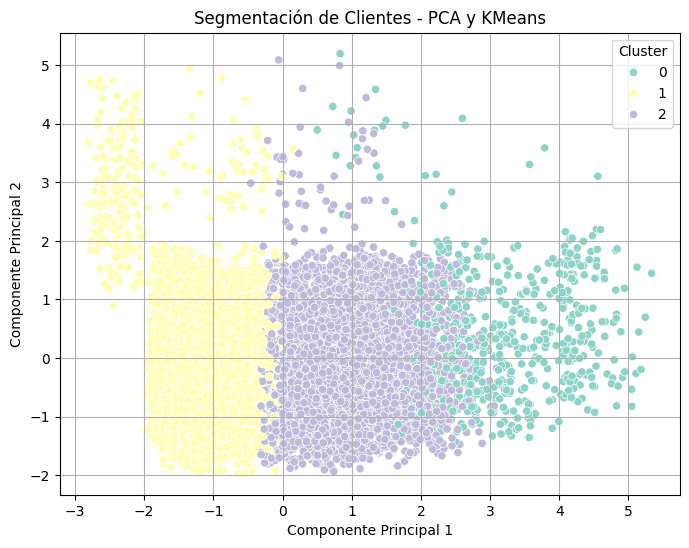

In [421]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df_clean2['Cluster'], palette='Set3')
plt.title('Segmentación de Clientes - PCA y KMeans')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid()
plt.legend(title='Cluster')
plt.show()

In [ ]:


# Método del Codo
inertia = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.plot(range(2, 11), inertia, marker='o')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Inercia')
plt.title('Método del Codo')
plt.show()

# Silhouette Score
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')
plt.show()

In [283]:
from sklearn.cluster import KMeans

# Asumiendo que X contiene tus datos normalizados (sin columnas no numéricas)
kmeans = KMeans(n_clusters=4, random_state=42)
df_clean2['Cluster'] = kmeans.fit_predict(X)  # X debe ser un array/DataFrame numérico

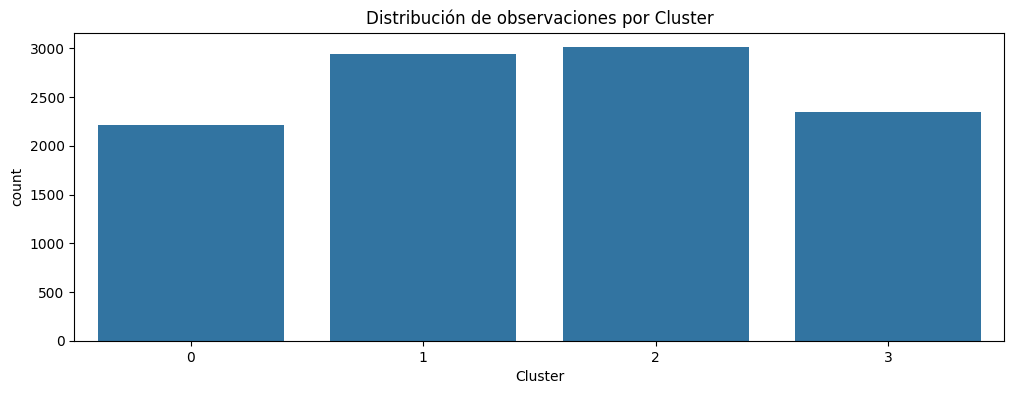

In [284]:
import seaborn as sns
plt.figure(figsize=(12, 4))
sns.countplot(x='Cluster', data=df_clean2)
plt.title('Distribución de observaciones por Cluster')
plt.show()

In [285]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_clean2[:, 0], y=df_clean2[:, 1], hue=df_clean2['Cluster'], palette='Set3')
plt.title('Segmentación de Clientes - PCA y KMeans')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid()
plt.legend(title='Cluster')
plt.show()

InvalidIndexError: (slice(None, None, None), 0)

<Figure size 800x600 with 0 Axes>